## Jupyter notebook to demonstrate use of downsampling for imbalanced datasets

### In the previous notebook, we looked at exploratory analysis. This notebook demonstrates a quick and dirty analysis to predict FRAUD. As expected, the sample is heavily imbalanced. One of 

In [56]:
import pandas as pd
import numpy as np
import collections
newdf=pd.read_csv("data.csv")

### Four variables measuring Planning and Managing have been reduced using PCA to two factors each

In [57]:
newdf.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [58]:
newdf.columns

Index(['PUF_ID', 'sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore',
       'FWB1_1', 'FWB1_2', 'FWB1_3',
       ...
       'PPMSACAT', 'PPREG4', 'PPREG9', 'PPT01', 'PPT25', 'PPT612', 'PPT1317',
       'PPT18OV', 'PCTLT200FPL', 'finalwt'],
      dtype='object', length=217)

### Dropping missing values

In [59]:
newdf=newdf.replace(-1, np.nan)
newdf=newdf.replace(-1, np.nan)
newdf=newdf.dropna()
newdf=newdf.astype("int64")
newdf=newdf.reset_index(drop=True)

### Using PCA for dimensionality reduction

In [60]:
#selecting specific columns for PCA
df_pca_prop=newdf.loc[:,['PROPPLAN_1', 'PROPPLAN_2','PROPPLAN_3', 'PROPPLAN_4', 
                ]].copy()
from sklearn.decomposition import PCA
pca_sk = PCA()
pca_sk.fit(df_pca_prop)
X_transformed_sk =  pca_sk.fit_transform(df_pca_prop)
Xdf=pd.DataFrame(X_transformed_sk[:,0:2])
Xdf.reset_index(drop=True)
resultdf = pd.concat([newdf, Xdf], axis=1)
resultdf=resultdf.rename(columns={0:"plan1",1:"plan2"})

In [61]:
#selecting specific columns for PCA
df_pca_man=newdf.loc[:,['MANAGE1_1', 'MANAGE1_2', 'MANAGE1_3','MANAGE1_4']].copy()
#doing the dimensionality reduction for manage
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca_man)
X_tr_sk =  pca_sk.fit_transform(df_pca_man)
Xdf=pd.DataFrame(X_tr_sk[:,0:2])
Xdf.reset_index(drop=True)
resultdf = pd.concat([resultdf, Xdf], axis=1)
resultdf=resultdf.rename(columns={0:"manage1",1:"manage2"})

### Dropping other columns

In [62]:
resultdf=resultdf.drop(columns=['PROPPLAN_1','PROPPLAN_2','PROPPLAN_3','PROPPLAN_4',
                       'MANAGE1_1','MANAGE1_2','MANAGE1_3','MANAGE1_4','PUF_ID','sample','finalwt',
                               'FWB1_1','FWB1_2','FWB1_3','FWB1_4','FWB1_5','FWB1_6',
                               'FWB2_1','FWB2_2','FWB2_3','FWB2_4','FS1_1','FS1_2','FS1_3','FS1_4',
                               'FS1_5','FS1_6','FS1_7','FS2_1','FS2_2','FS2_3'])

In [63]:
resultdf=resultdf.drop(columns=['AUTOMATED_1','AUTOMATED_2'])
resultdf=resultdf.drop(columns=['ASK1_1','ASK1_2','SUBNUMERACY1','SUBNUMERACY2'])

In [64]:
columns=resultdf.columns
columns

Index(['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore', 'FSscore', 'SUBKNOWL1',
       'ACT1_1', 'ACT1_2', 'FINGOALS',
       ...
       'PPT01', 'PPT25', 'PPT612', 'PPT1317', 'PPT18OV', 'PCTLT200FPL',
       'plan1', 'plan2', 'manage1', 'manage2'],
      dtype='object', length=184)

## Using a subset of specific columns for prediction, depending on domain knowledge

In [65]:
cols=['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FSscore', 'SUBKNOWL1','agecat', 'generation','FINGOALS', 'SAVEHABIT',
      'HOUSING', 'LIVINGARRANGEMENT','VOLATILITY','FRAUD2','REJECTED_1','BENEFITS_1',
      'HHEDUC','KIDS_NoChildren', 'KIDS_1', 'KIDS_2', 'KIDS_3', 'KIDS_4',
      'PPEDUC', 'PPETHM', 'PPGENDER', 'PPHHSIZE', 'PPINCIMP', 'PPMARIT','plan1','plan2','manage1','manage2']

In [66]:
finaldf=resultdf[cols].copy()

In [67]:
finaldf.columns

Index(['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FSscore', 'SUBKNOWL1', 'agecat',
       'generation', 'FINGOALS', 'SAVEHABIT', 'HOUSING', 'LIVINGARRANGEMENT',
       'VOLATILITY', 'FRAUD2', 'REJECTED_1', 'BENEFITS_1', 'HHEDUC',
       'KIDS_NoChildren', 'KIDS_1', 'KIDS_2', 'KIDS_3', 'KIDS_4', 'PPEDUC',
       'PPETHM', 'PPGENDER', 'PPHHSIZE', 'PPINCIMP', 'PPMARIT', 'plan1',
       'plan2', 'manage1', 'manage2'],
      dtype='object')

### Doing one-hot encoding for categorical variables

In [68]:
catcols=['agecat', 'generation','FINGOALS', 'SAVEHABIT',
      'HOUSING', 'LIVINGARRANGEMENT','VOLATILITY','REJECTED_1','BENEFITS_1',
      'HHEDUC','KIDS_NoChildren', 'KIDS_1', 'KIDS_2', 'KIDS_3', 'KIDS_4',
      'PPEDUC', 'PPETHM', 'PPGENDER', 'PPHHSIZE', 'PPINCIMP', 'PPMARIT']
for col in catcols:
    dummy=pd.get_dummies(finaldf[col],prefix=col)
    finaldf=pd.concat([finaldf,dummy],axis=1)

In [69]:
finaldf.columns

Index(['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FSscore', 'SUBKNOWL1', 'agecat',
       'generation', 'FINGOALS', 'SAVEHABIT',
       ...
       'PPINCIMP_5', 'PPINCIMP_6', 'PPINCIMP_7', 'PPINCIMP_8', 'PPINCIMP_9',
       'PPMARIT_1', 'PPMARIT_2', 'PPMARIT_3', 'PPMARIT_4', 'PPMARIT_5'],
      dtype='object', length=116)

## Heavily unbiased sample, we shall use downsampling

In [70]:
#heavily biased towards 0 class, let us try downsampling
# Separate majority and minority classes
df_majority=finaldf[finaldf.FRAUD2==0].copy()
df_minority = finaldf[finaldf.FRAUD2==1].copy()
print(df_majority.FRAUD2.value_counts())
print(df_minority.FRAUD2.value_counts())
nsamples=df_minority.FRAUD2.value_counts()
from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=nsamples[1],     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.FRAUD2.value_counts()

0    2656
Name: FRAUD2, dtype: int64
1    1129
Name: FRAUD2, dtype: int64


1    1129
0    1129
Name: FRAUD2, dtype: int64

### Splitting the dataset into training and validation

In [71]:
mdf=df_downsampled.copy()
mdf=mdf.dropna()
from sklearn.model_selection import train_test_split

train, test = train_test_split(mdf, test_size=0.2)
train=train.dropna()
test=test.dropna()
#predictors=['FSscore','ACT1_1', 'ACT1_2', 'fingoals_0.0', 'fingoals_1.0','agecat_1', 'agecat_2', 'agecat_3', 'agecat_4', 'agecat_5', 'agecat_6',
 #      'agecat_7', 'agecat_8']
predictors=['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FSscore', 'SUBKNOWL1',
            'plan1', 'plan2', 'manage1', 'manage2',
            'agecat_1', 'agecat_2', 'agecat_3', 'agecat_4', 'agecat_5', 'agecat_6',
            'agecat_7', 'agecat_8','generation_1', 'generation_2', 'generation_3', 'generation_4',
            'FINGOALS_0', 'FINGOALS_1', 'SAVEHABIT_1', 'SAVEHABIT_2', 'SAVEHABIT_3',
            'SAVEHABIT_4', 'SAVEHABIT_5', 'SAVEHABIT_6', 'HOUSING_1', 'HOUSING_2',
            'HOUSING_3', 'LIVINGARRANGEMENT_1', 'LIVINGARRANGEMENT_2',
            'LIVINGARRANGEMENT_3', 'LIVINGARRANGEMENT_4', 'LIVINGARRANGEMENT_5',
            'VOLATILITY_1', 'VOLATILITY_2', 'VOLATILITY_3', 'REJECTED_1_0',
            'REJECTED_1_1', 'BENEFITS_1_0', 'BENEFITS_1_1', 'HHEDUC_1', 'HHEDUC_2',
            'HHEDUC_3', 'HHEDUC_4', 'HHEDUC_5', 'KIDS_NoChildren_0',
            'KIDS_NoChildren_1', 'KIDS_1_0', 'KIDS_1_1', 'KIDS_1_2', 'KIDS_2_0',
            'KIDS_2_1', 'KIDS_2_2','KIDS_3_0', 'KIDS_3_1', 'KIDS_3_2', 'KIDS_4_0', 'KIDS_4_1', 'KIDS_4_2',
            'PPEDUC_1', 'PPEDUC_2', 'PPEDUC_3', 'PPEDUC_4', 'PPEDUC_5', 'PPETHM_1',
            'PPETHM_2', 'PPETHM_3', 'PPETHM_4', 'PPGENDER_1', 'PPGENDER_2',
            'PPHHSIZE_1', 'PPHHSIZE_2', 'PPHHSIZE_3','PPHHSIZE_4', 'PPHHSIZE_5', 
            'PPINCIMP_1', 'PPINCIMP_2', 'PPINCIMP_3','PPINCIMP_4', 'PPINCIMP_5', 
            'PPINCIMP_6', 'PPINCIMP_7', 'PPINCIMP_8',
            'PPINCIMP_9', 'PPMARIT_1', 'PPMARIT_2', 'PPMARIT_3', 'PPMARIT_4','PPMARIT_5'
           ]
#predictors=['FSscore','KIDS_NoChildren']
label=['FRAUD2']

### Creating X and Y set for both training and validation

In [72]:
X_train =train[predictors]
y_train =train[label]
X_test = test[predictors]
y_test = test[label]

#xgboost needs ravel
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [73]:
#importing all the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



#import accuracy measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

models=[]


models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
#models.append(("CatBoost",CatBoostClassifier()))



# evaluate each model in turn

names = []
accuracy=[]
rocscore=[]
for name, model in models:
    modelfit=model.fit(X_train,y_train)
    predval=modelfit.predict(X_test)
    accu_score=accuracy_score(predval, y_test)
    predprob=model.predict_proba(X_test)
    roscore=roc_auc_score(y_test, predprob[:,1])
    confmatrix=confusion_matrix(predval,y_test)
    print(confmatrix)
    names.append(name)
    accuracy.append(accu_score)
    rocscore.append(roscore)
    msg = "%s: %f %f" % (name, accu_score,roscore)
    print(msg)


[[117 108]
 [118 109]]
Decision Tree: 0.500000 0.500088
[[153 116]
 [ 82 101]]
Random Forest: 0.561947 0.577821
[[127  82]
 [108 135]]
GBM: 0.579646 0.603883
[[126  79]
 [109 138]]
XGB: 0.584071 0.625728


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Conclusion: XGBoost does the best job of ROC score which is a better judge of how a model performs

## Trying CATBOOST to see if it gives better results given the prevalence of categorical variables

In [75]:
#splitting dataset for training and test
#mdf=df_downsampled.copy()- not doing downsampling
mdf=df_downsampled.copy()
mdf=mdf.dropna()
mdf=mdf.loc[:,['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FSscore', 'SUBKNOWL1', 'agecat',
       'generation', 'FINGOALS', 'SAVEHABIT', 'HOUSING', 'LIVINGARRANGEMENT',
       'VOLATILITY', 'FRAUD2', 'REJECTED_1', 'BENEFITS_1', 'HHEDUC',
       'KIDS_NoChildren', 'KIDS_1', 'KIDS_2','KIDS_3', 'KIDS_4', 'PPEDUC', 'PPETHM', 'PPGENDER', 'PPHHSIZE',
       'PPINCIMP', 'PPMARIT', 'plan1', 'plan2', 'manage1', 'manage2']]

from sklearn.model_selection import train_test_split
predictors=['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FSscore', 'SUBKNOWL1', 'agecat',
       'generation', 'FINGOALS', 'SAVEHABIT', 'HOUSING', 'LIVINGARRANGEMENT',
       'VOLATILITY', 'REJECTED_1', 'BENEFITS_1', 'HHEDUC',
       'KIDS_NoChildren', 'KIDS_1', 'KIDS_2','KIDS_3', 'KIDS_4', 'PPEDUC', 'PPETHM', 'PPGENDER', 'PPHHSIZE',
       'PPINCIMP', 'PPMARIT', 'plan1', 'plan2', 'manage1', 'manage2']
train, test = train_test_split(mdf, test_size=0.2)
train=train.dropna()
test=test.dropna()
label=['FRAUD2']
Xcat_train =train[predictors]
ycat_train =train[label]
Xcat_test = test[predictors]
ycat_test = test[label]

0:	learn: 0.5644970	total: 80.6ms	remaining: 726ms
1:	learn: 0.5221289	total: 90.9ms	remaining: 364ms
2:	learn: 0.5071739	total: 99.7ms	remaining: 233ms
3:	learn: 0.4985964	total: 113ms	remaining: 170ms
4:	learn: 0.4932574	total: 125ms	remaining: 125ms
5:	learn: 0.4867888	total: 142ms	remaining: 94.4ms
6:	learn: 0.4820889	total: 160ms	remaining: 68.6ms
7:	learn: 0.4799447	total: 168ms	remaining: 41.9ms
8:	learn: 0.4794732	total: 190ms	remaining: 21.1ms
9:	learn: 0.4756200	total: 206ms	remaining: 0us
Printing the ROC


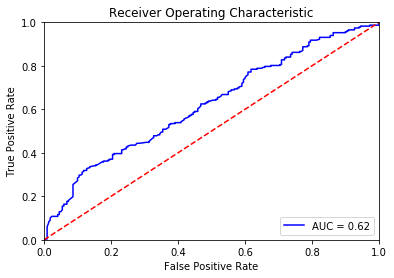

In [76]:
#trying catboost given so many categorical variables
# Initialize CatBoostClassifier
from catboost import CatBoostClassifier
#import accuracy measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
#model_cb = CatBoostClassifier(iterations=15, learning_rate=0.4, depth=7,bagging_temperature=0.75,leaf_estimation_method="Gradient",loss_function='Logloss')
predictors=['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FSscore', 'SUBKNOWL1', 'agecat',
       'generation', 'FINGOALS', 'SAVEHABIT', 'HOUSING', 'LIVINGARRANGEMENT',
       'VOLATILITY', 'REJECTED_1', 'BENEFITS_1', 'HHEDUC',
       'KIDS_NoChildren', 'KIDS_1', 'KIDS_2','KIDS_3', 'KIDS_4', 'PPEDUC', 'PPETHM', 'PPGENDER', 'PPHHSIZE',
       'PPINCIMP', 'PPMARIT', 'plan1', 'plan2', 'manage1', 'manage2']
#predictors=['FSscore','KIDS_NoChildren']
label=['FRAUD2']
model_cb = CatBoostClassifier(iterations=10, learning_rate=0.4, depth=5,loss_function='Logloss',scale_pos_weight=4)
categoricalpred=[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
noncat=['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FSscore', 'SUBKNOWL1','plan1', 'plan2', 'manage1', 'manage2']
# Fit model
model_cb.fit(Xcat_train, ycat_train,cat_features=categoricalpred)
predcb=model_cb.predict(Xcat_test)
predprob=model_cb.predict_proba(Xcat_test)
cbscore=roc_auc_score(ycat_test, predprob[:,1])
preds = predprob[:,1]
print("Printing the ROC")
from sklearn import metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = predprob[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycat_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt

%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Catboost does a good job of balancing the True Positive Rate as well as False Positive Rate